<a href="https://colab.research.google.com/github/davidfox87/neuro_encoding_models/blob/master/filter_summary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Comparison of basis vector strength between neural and behavioral parameters

Content creator: David Fox

In [2]:
#@title Clone the github repository 
!git clone https://github.com/davidfox87/neuro_encoding_models

Cloning into 'neuro_encoding_models'...
remote: Enumerating objects: 17, done.
remote: Counting objects: 100% (17/17), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 615 (delta 6), reused 7 (delta 3), pack-reused 598
Receiving objects: 100% (615/615), 82.60 MiB | 9.39 MiB/s, done.
Resolving deltas: 100% (352/352), done.


In [37]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [4]:
%cd neuro_encoding_models/

/content/neuro_encoding_models


In [5]:
#@title add package to google colab
import sys, os
sys.path.append(os.getcwd())

In [8]:
#@title import modules

import numpy as np
from matplotlib import pyplot as plt
import matplotlib.gridspec as gridspec
import pickle


# load pickle files

In [44]:
pkl_file = open('/content/drive/MyDrive/temporal_filter_data_files_for_colab/vmoves_out.pkl', 'rb')
vmoves_out = pickle.load(pkl_file)

pkl_file = open('/content/drive/MyDrive/temporal_filter_data_files_for_colab/vymoves_out.pkl', 'rb')
vymoves_out = pickle.load(pkl_file)

pkl_file = open('/content/drive/MyDrive/temporal_filter_data_files_for_colab/angvturns_out.pkl', 'rb')
angvturns_out = pickle.load(pkl_file)

pkl_file = open('/content/drive/MyDrive/temporal_filter_data_files_for_colab/pn1_out.pkl', 'rb')
pn1_out = pickle.load(pkl_file)

dt = 0.001
t = np.arange(len(vmoves_out['response'])) * dt
tpn = np.arange(len(pn1_out['response'])) * dt

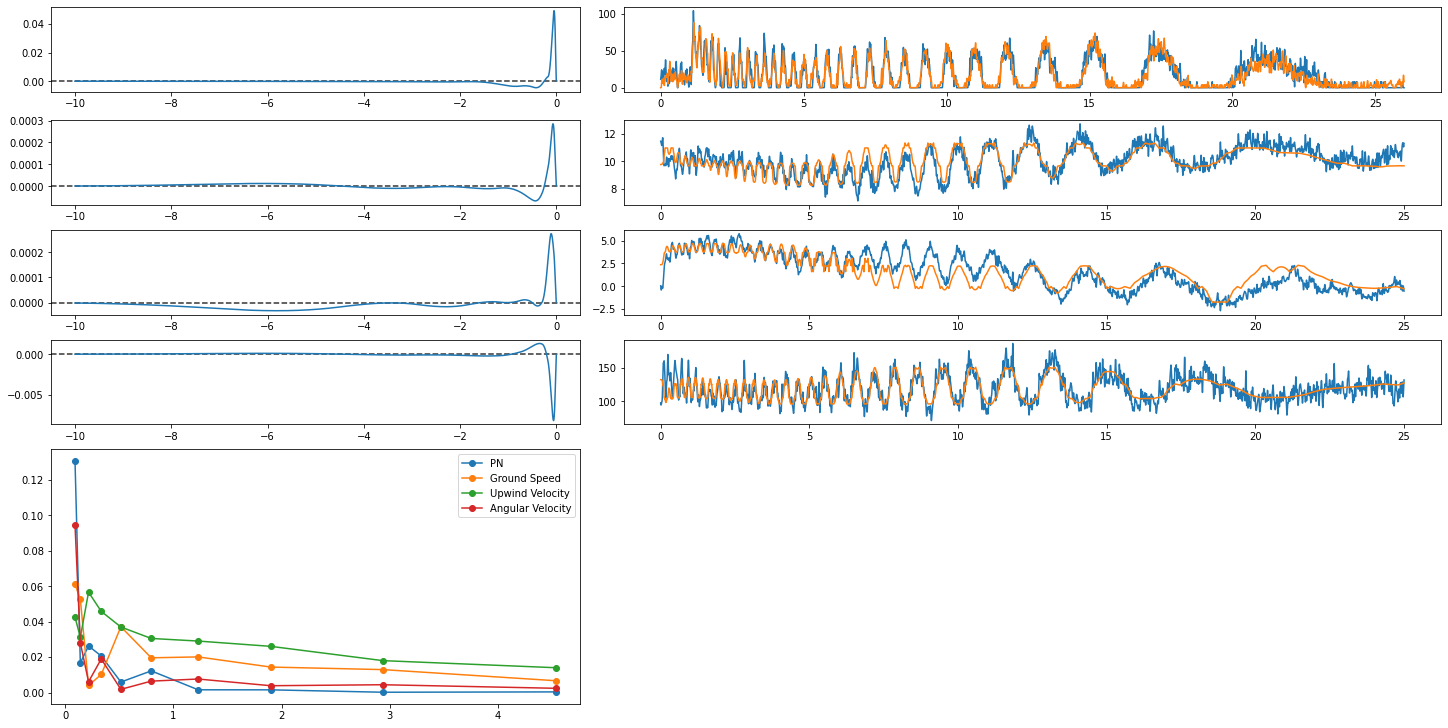

In [50]:
fig = plt.figure(constrained_layout=True, figsize=[20, 10])
spec2 = gridspec.GridSpec(ncols=5, nrows=7, figure=fig)

f_ax0_1 = fig.add_subplot(spec2[0, :2])
f_ax0_2 = fig.add_subplot(spec2[0, 2:])
f_ax0_1.plot(pn1_out['k'][0], pn1_out['k'][1])
f_ax0_1.axhline(0, color=".2", linestyle="--", zorder=1)
f_ax0_2.plot(tpn, pn1_out['response'])
f_ax0_2.plot(tpn, pn1_out['prediction'][1])


f_ax1_1 = fig.add_subplot(spec2[1, :2])
f_ax1_2 = fig.add_subplot(spec2[1, 2:])
f_ax1_1.plot(vmoves_out['k'][0], vmoves_out['k'][1])
f_ax1_1.axhline(0, color=".2", linestyle="--", zorder=1)
f_ax1_2.plot(t, vmoves_out['response'])
f_ax1_2.plot(t, vmoves_out['prediction'][1])


f_ax2_1 = fig.add_subplot(spec2[2, :2])
f_ax2_2 = fig.add_subplot(spec2[2, 2:])
f_ax2_1.plot(vymoves_out['k'][0], vymoves_out['k'][1])
f_ax2_1.axhline(0, color=".2", linestyle="--", zorder=1)
f_ax2_2.plot(t, vymoves_out['response'])
f_ax2_2.plot(t, vymoves_out['prediction'][1])


f_ax3_1 = fig.add_subplot(spec2[3, :2])
f_ax3_2 = fig.add_subplot(spec2[3, 2:])
f_ax3_1.plot(angvturns_out['k'][0], angvturns_out['k'][1])
f_ax3_1.axhline(0, color=".2", linestyle="--", zorder=1)
f_ax3_2.plot(t, angvturns_out['response'])
f_ax3_2.plot(t, angvturns_out['prediction'][1])

f_ax4_1 = fig.add_subplot(spec2[4:, :2])
f_ax4_1.plot(pn1_out['basis_center'], pn1_out['basis_weights'], '-o', label='PN')
f_ax4_1.plot(vmoves_out['basis_center'], vmoves_out['basis_weights'], '-o', label='Ground Speed')
f_ax4_1.plot(vymoves_out['basis_center'], vymoves_out['basis_weights'], '-o', label='Upwind Velocity')
f_ax4_1.plot(angvturns_out['basis_center'], angvturns_out['basis_weights'], '-o', label='Angular Velocity')
f_ax4_1.legend()
plt.show()